In [ ]:
#Loading Dataset
import numpy as np
import os
import matplotlib.pyplot as plt

In [7]:
import tensorflow as tf
ds = tf.data.TFRecordDataset('/kaggle/input/input-pixels'+'/'+"new_data2.tfrecord")



In [5]:
dy = tf.data.TFRecordDataset('/kaggle/input/groundtruth/new_datay2.tfrecord')

In [2]:
#Converting data to numpy array
x=np.array(x)
y=np.array(y)

In [29]:
print("Dimensions of ash colored images ",x.shape)#Dimensions of data
print("Diensions of Human Mask",y.shape)

Dimensions of ash colored images  (3000, 256, 256, 3)
Diensions of Human Mask (3000, 256, 256, 1)


In [3]:
y=y.reshape(3000,256,256,1)#Reshaping the target

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [ ]:
x=xtrain[0]
y=ytrain[0]
plt.figure(figsize=(100,50))
plt.subplot(1,2,1)
plt.imshow(x)#Displaying a sample image
plt.title("Ash Colored Image",fontsize="55")
plt.subplot(1,2,2)
plt.imshow(y)#Displaying mask corresponding to the image
plt.title("Human pixel mask",fontsize="55")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split #Splitting model into training and testing set
Xtrain,xtest,Ytrain,ytest=train_test_split(xtrain,ytrain,test_size=0.2,random_state=0)
print('Training Set Size ',len(xtrain))
print('Testing Set Size ',len(xtest))

In [11]:
import tensorflow as tf
from tensorflow import keras
from keras.models import *
from keras.layers import *
import numpy as np
from tensorflow.keras.layers import Activation, Dense, Dropout, Conv2D, Conv2DTranspose, MaxPooling2D, Concatenate, Input, Cropping2D, Flatten
from keras.models import Model
from tensorflow import keras


#constructing the unet model
def conv(inputs, num_filters):
    x = Conv2D(num_filters,(3,3), activation="relu", 
                               kernel_initializer="he_normal", padding="same")(inputs)
   
    x = Conv2D(num_filters, (3, 3), activation="relu", 
                               kernel_initializer="he_normal", padding="same")(x)
    return x
def deconv(inputs, conv_prev, num_filters):
    up = Conv2DTranspose(num_filters, (2, 2), strides=(2, 2), padding="same")(inputs)
    concat =  tf.keras.layers.concatenate([up, conv_prev])
    conva = conv(concat, num_filters)
    return conva

#Encoder
inputs = Input((256, 256, 3))
c1=conv(inputs,64)
p1=MaxPooling2D((2,2))(c1)
c2=conv(p1,128)
p2=MaxPooling2D((2,2))(c2)
c3=conv(p2,256)
p3=MaxPooling2D((2,2))(c3)
c4=conv(p3,512)
p4=MaxPooling2D((2,2))(c4)

#Bottleneck
c5=conv(p4,1024)

#Decoder
c6 = deconv(c5, c4, 512)
c7 = deconv(c6, c3, 256)
c8 = deconv(c7, c2, 128)
c9 = deconv(c8, c1, 64)

#Output Layer
op= Conv2D(1,(1,1), activation='sigmoid',padding='same')(c9)
model = tf.keras.Model(inputs=[inputs], outputs=[op])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 256, 256, 64  1792        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_1 (Conv2D)              (None, 256, 256, 64  36928       ['conv2d[0][0]']                 
                                )                                                             

In [12]:
#Training the model with the training set
results = model.fit(
    xtrain, 
    ytrain, 
    validation_split = 0.1, 
    batch_size = 20, 
    epochs = 25)

Epoch 1/25
108/108 [==============================] - 150s 984ms/step - loss: 0.0693 - accuracy: 0.9878 - val_loss: 0.0677 - val_accuracy: 0.9862
Epoch 2/25
108/108 [==============================] - 107s 995ms/step - loss: 0.0565 - accuracy: 0.9881 - val_loss: 0.0613 - val_accuracy: 0.9862
Epoch 3/25
108/108 [==============================] - 107s 996ms/step - loss: 0.0519 - accuracy: 0.9882 - val_loss: 0.0598 - val_accuracy: 0.9858
Epoch 4/25
108/108 [==============================] - 107s 988ms/step - loss: 0.0489 - accuracy: 0.9882 - val_loss: 0.0522 - val_accuracy: 0.9863
Epoch 5/25
108/108 [==============================] - 107s 990ms/step - loss: 0.0439 - accuracy: 0.9885 - val_loss: 0.0462 - val_accuracy: 0.9871
Epoch 6/25
108/108 [==============================] - 107s 990ms/step - loss: 0.0392 - accuracy: 0.9890 - val_loss: 0.0417 - val_accuracy: 0.9877
Epoch 7/25
108/108 [==============================] - 107s 987ms/step - loss: 0.0369 - accuracy: 0.9893 - val_loss: 0.0393 -

In [41]:
model.save('cnn_semantics.h5') #Saving the model 

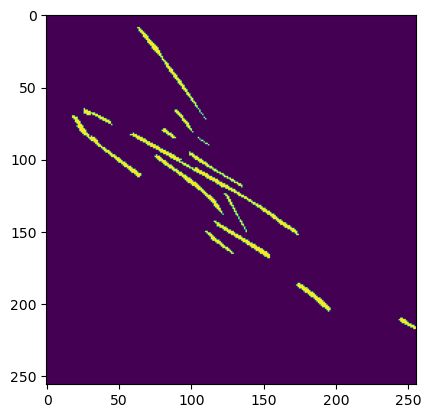

In [36]:
import matplotlib.pyplot as plt
xt=xtest[214]
yt=ytest[214]

plt.imshow(yt)

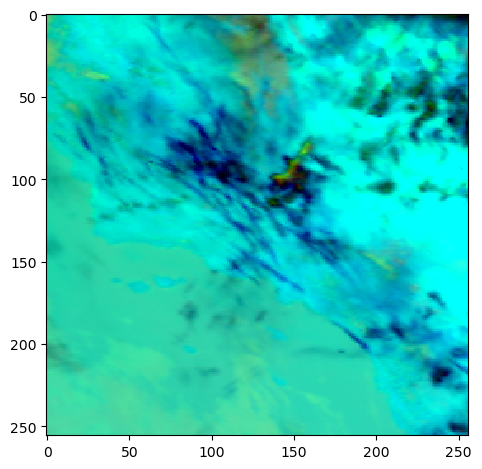

In [37]:
plt.imshow(xt)

In [38]:
xt=np.expand_dims(xt,axis=0)
print(xt.shape)
xt1 = xtest[100]
print(xt1.shape)

(1, 256, 256, 3)
(256, 256, 3)


In [39]:
prediction = model.predict(xt,verbose=1)


1/1 [==============================] - 0s 26ms/step


In [53]:
prediction=(prediction).astype(float)

In [5]:
import tensorflow as tf
from tensorflow import keras
from keras.models import *
from keras.layers import *
import numpy as np
from tensorflow.keras.layers import Activation, Dense, Dropout, Conv2D, Conv2DTranspose, MaxPooling2D, Concatenate, Input, Cropping2D, Flatten
from keras.models import Model
from tensorflow import keras
new_model=tf.keras.models.load_model("/kaggle/input/modelcnn/cnn_semantics.h5")

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

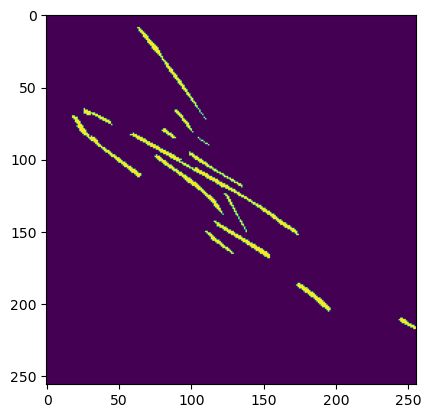

In [15]:
import matplotlib.pyplot as plt
xt=xtest[214]
yt=ytest[214]


In [16]:
xt=np.expand_dims(xt,axis=0)
ypred=new_model.predict(xt,verbose=1)
ypredt=ypred>0.5

1/1 [==============================] - 0s 25ms/step


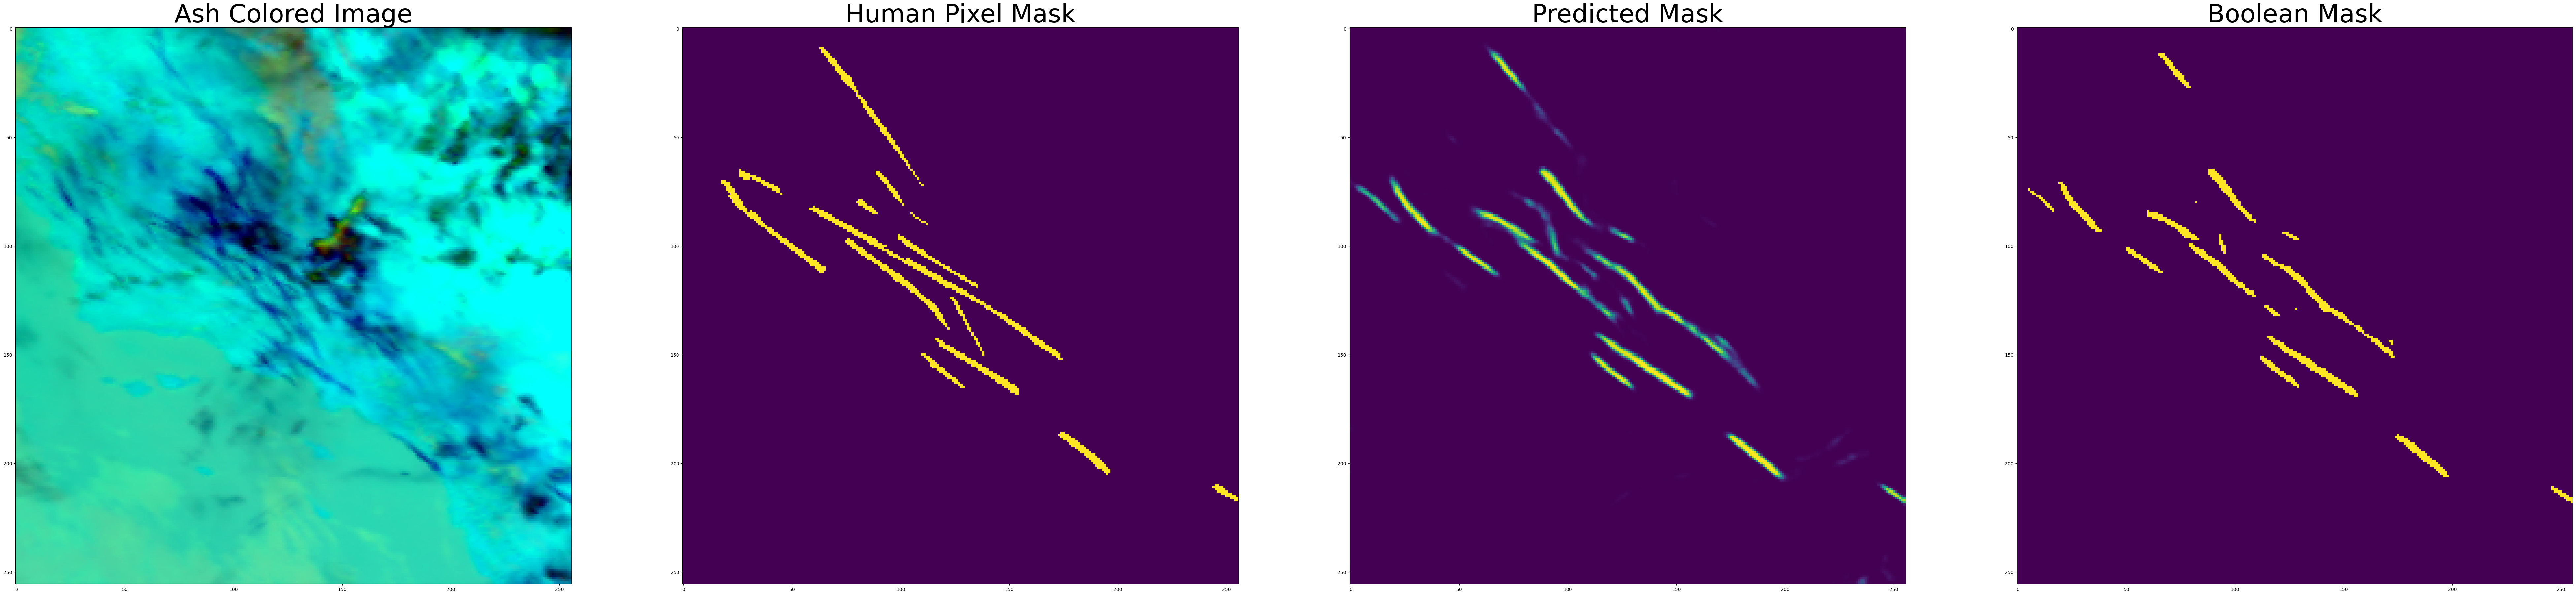

In [27]:
plt.figure(figsize=(100,100))
plt.subplot(1,4,1)
plt.imshow(xt[0])
plt.title("Ash Colored Image",fontsize="55")
plt.subplot(1,4,2)
plt.imshow(yt)
plt.title("Human Pixel Mask",fontsize="55")
plt.subplot(1,4,3)
plt.imshow(ypred[0])
plt.title("Predicted Mask",fontsize="55")
plt.subplot(1,4,4)
plt.imshow(ypredt[0])
plt.title("Boolean Mask",fontsize="55")
plt.show()

In [12]:
inter=np.logical_and(ytest,ypredt)
union=np.logical_or(ytest,ypredt)
iou=np.sum(inter)/np.sum(union)
iou

0.40002853565172986